<a href="https://colab.research.google.com/github/SunitKolabkar/Deep-Learning/blob/master/Other_Data_Formats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)
path

PosixPath('/root/.fastai/data/mnist_sample')

In [0]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path,
                                  ds_tfms=tfms,
                                  size=26)

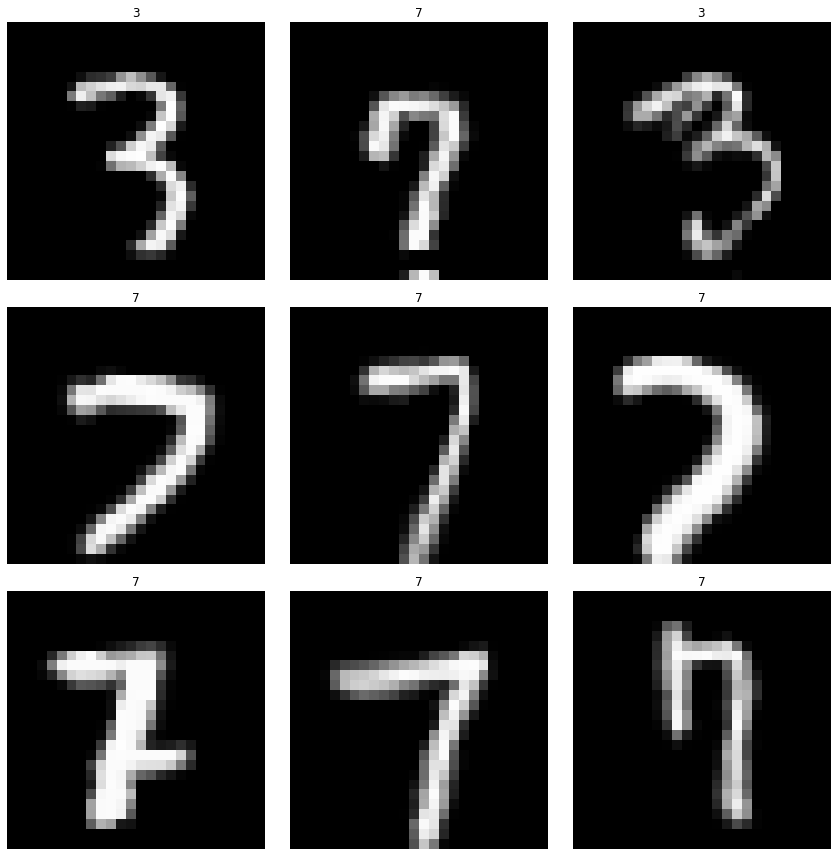

In [4]:
data.show_batch(rows=3, fig_size=(5,5))

In [7]:
learn = cnn_learner(data,
                    models.resnet18,
                    metrics=accuracy)
learn.fit(2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.189731,0.115257,0.955348,00:25
1,0.120109,0.053093,0.982336,00:24


In [9]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [0]:
data = ImageDataBunch.from_csv(path,
                      ds_tfms=tfms,
                      size=28)

[0, 1]

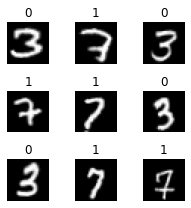

In [12]:
data.show_batch(rows=3, figsize=(3,3))
data.classes

In [13]:
data = ImageDataBunch.from_df(path,
                              df,
                              ds_tfms=tfms,
                              size=24)
data.classes

[0, 1]

In [14]:
fn_paths = [path/name for name in df['name']]
fn_paths[:2]

[PosixPath('/root/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/root/.fastai/data/mnist_sample/train/3/21102.png')]

In [16]:
pat = r'/(\d)/\d+\.png$'
data = ImageDataBunch.from_name_re(path,
                                   fn_paths,
                                   pat=pat,
                                   ds_tfms=tfms,
                                   size=24)
data.classes

['3', '7']

In [17]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['3', '3', '3', '3', '3']

In [18]:
data = ImageDataBunch.from_lists(path,
                                 fn_paths,
                                 labels=labels,
                                 ds_tfms=tfms,
                                 size=24)
data.classes

['3', '7']